<a href="https://colab.research.google.com/github/kishankasaudhan/NLP/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("headbrain.csv")

In [5]:
df.shape

(237, 4)

In [6]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values


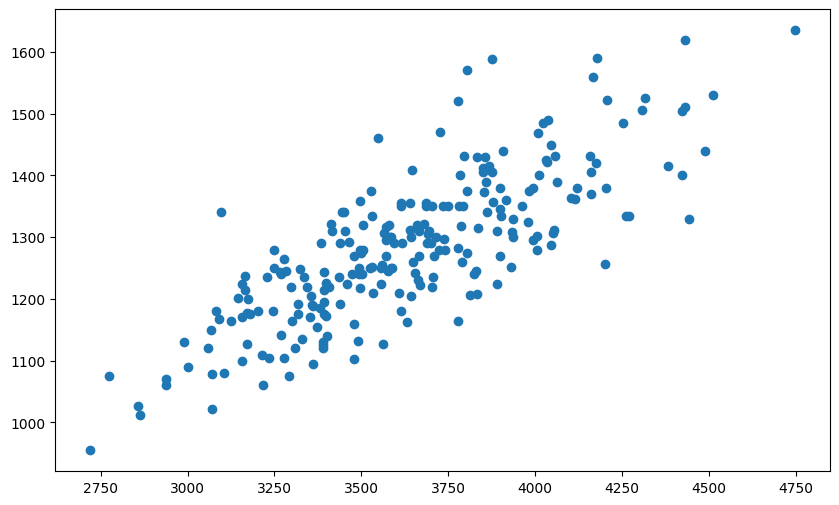

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.show()

In [9]:
mean_x = np.mean(X)
mean_y = np.mean(y)
mean_x,mean_y

(np.float64(3633.9915611814345), np.float64(1282.873417721519))

In [10]:
numer=0
deno=0
n=len(X)
for i in range(n):
    numer+=(X[i]-mean_x)*(y[i]-mean_y)
    deno+=(X[i]-mean_x)**2
slope=numer/deno
intercept=mean_y-(slope*mean_x)
print("Slope: ",slope)
print("Intercept: ",intercept)

Slope:  0.26342933948939945
Intercept:  325.57342104944223


In [11]:
predictions = []
for i in range(n):
  y_pred = slope * X[i] + intercept
  predictions.append(int(y_pred))
print("Predictions: ",predictions[:5])
print("Actual: ",y[:5])

Predictions:  [1514, 1310, 1448, 1320, 1425]
Actual:  [1530 1297 1335 1282 1590]


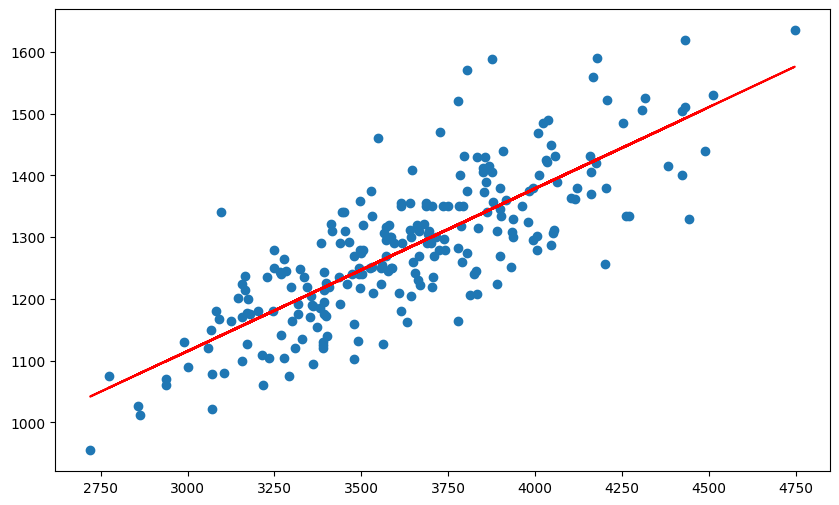

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions,'r')
plt.show()

In [13]:
error = 0
for i in range(n):
  error += (predictions[i] - y[i]) ** 2

mse = error / n
print("MSE: ",mse)
print("RMSE: ",np.sqrt(mse))

MSE:  5202.9029535864975
RMSE:  72.13115106239812


# GRADIENT DESCENT

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
X = np.reshape(X,(-1,1))   #-1 means it automatically calculates no. of rows or columns
y = np.reshape(y,(-1,1))   # it doesnt explain 1D model/data

minmax = MinMaxScaler()
scaled_x = minmax.fit_transform(X)
scaled_y = minmax.fit_transform(y)

In [16]:
scaled_x[:5]

array([[0.88406512],
       [0.50222003],
       [0.7602368 ],
       [0.52146029],
       [0.71879625]])

In [17]:
def gradient_descent(epochs, alpha):
  slope, inter = 0,0
  for i in range (epochs):
    y_pred = slope * scaled_x + inter
    loss = y_pred - scaled_y
    gradSlope = (2/n) * np.sum(loss*scaled_x)
    gradInter = (2/n) * np.sum(loss)
    slope = slope - gradSlope * alpha
    inter = inter - gradInter * alpha
  return slope,inter

In [18]:
epochs = 200
alpha = 0.01
slope, inter = gradient_descent(epochs, alpha)
print("Slope: ",slope)
print("Inter: ",inter)

Slope:  0.246871673827028
Inter:  0.3738405801877584


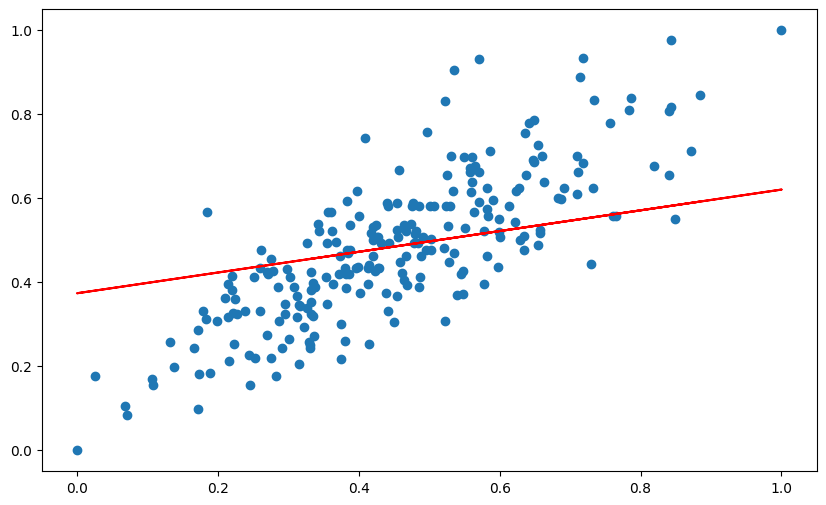

In [19]:
predictions = []
for i in range(n):
  y_pred = slope * scaled_x[i] + inter
  predictions.append(y_pred)

plt.figure(figsize=(10,6))
plt.scatter(scaled_x,scaled_y)
plt.plot(scaled_x,predictions,'r')
plt.show()